In [1]:
from sklearn.decomposition import PCA
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [2]:
Y= np.loadtxt('Y.txt')

In [3]:
# Here is the data of wavelength of mangroves data, but I don't know why I can't upload the to this file, but I can upload it on my
# own jutper notebook, so I woulad also sent the data to you, but if you want to run the code, I thik you should change the code below.

In [5]:
Wavelength= pd.read_csv('mangroves color.csv')

In [6]:
# in the first plot, can find noisy data in range (1800,2000), here are two thoughts to solve this, one is use LLE to reduce dimension 
# to the other is to remove data here.

In [7]:
Mean=np.mean(Wavelength,axis=0)
Sigma=np.std(Wavelength,axis=0)
T=Sigma/Mean

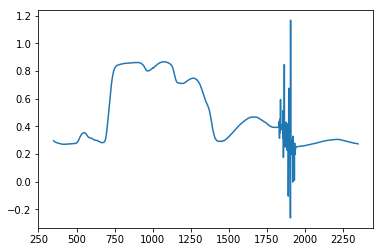

In [8]:
plt.plot(Y[0:2000],Mean[0:2000])

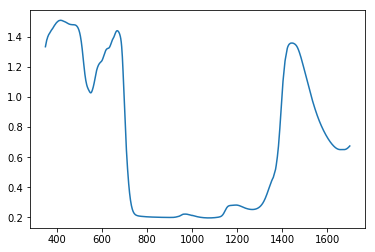

In [9]:
plt.plot(Y[0:1350],T[0:1350])

In [10]:
# As required, I try teo wavelength range here,(400,900), (400,2400)

In [11]:
Y[50],Y[550],Y[2050]

(400.0, 900.0, 2400.0)

In [12]:
x=Wavelength.T
wavelength2=x[50:2050].T
wavelength2.shape

(1104, 2000)

In [13]:
x=Wavelength.T
wavelength1=x[50:550].T
wavelength1.shape

(1104, 500)

In [14]:
# I try different methods to reduce the dimension here.
# There are some unlabeled data, and I want to mark them at last. 
# In my idea, I should reduce the dimension and then find the good classifier using the labeled data, and fit this best method to 
# unlabeled.
# So I should reduce the dimension for all the samples,not just the labeled data.
# I try some dimensions I should use and I showed their plots in some meetings. In this code I removed them, this is the next step 
# in my work.
# but these dimensions are ok and I have roughly compared them.

In [15]:
# these two are linear method.

In [16]:
pca=PCA(n_components=10)
X_PCA1=pca.fit_transform(wavelength1)
X_PCA2=pca.fit_transform(wavelength2)

In [17]:
ICA = FastICA(n_components=15,random_state=100) 
X_ICA1=ICA.fit_transform(wavelength1)
X_ICA2=ICA.fit_transform(wavelength2)

In [18]:
# This is nonlinear method

In [19]:
lle=LocallyLinearEmbedding(n_components=30,n_neighbors=50)
X_lle1=lle.fit_transform(wavelength1)
X_lle2=lle.fit_transform(wavelength2)

In [20]:
# new data, choose the labeled ones.

In [21]:
X_Pca1_labeled=X_PCA1[0:841]
X_Ica1_labeled=X_ICA1[0:841]
X_Lle1_labeled=X_lle1[0:841]
x_n1=wavelength1[0:841]

In [22]:
X_Pca2_labeled=X_PCA2[0:841]
X_Ica2_labeled=X_ICA2[0:841]
X_Lle2_labeled=X_lle2[0:841]
x_n2=wavelength2[0:841]

In [23]:
# target for four class(cloor).

In [24]:
from numpy import array

In [25]:
Target=array([ "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M",
               "M","M","M","M","M","M","M","M","M","M","M" ])

In [26]:
# target for three class, the mud class have many noisy data, but after comparing, this data won't affect the classification effect
# since the characteristic of these data is out standing, so I give up this idea.

In [27]:
target=array([ "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B"])

In [28]:
# split train data,and test data at random

In [29]:
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_Pca1_labeled,Target, test_size=0.3,random_state=42)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_Ica1_labeled,Target, test_size=0.3,random_state=42)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_Lle1_labeled,Target, test_size=0.3,random_state=42)
x1_train, x1_test, y1_train, y1_test = train_test_split(x_n1,Target, test_size=0.3,random_state=42)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_Pca2_labeled,Target, test_size=0.3,random_state=42)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_Ica2_labeled,Target, test_size=0.3,random_state=42)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_Lle2_labeled,Target, test_size=0.3,random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_n2,Target, test_size=0.3,random_state=42)

In [30]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# SVM model for two range (400,900) , (400,2400)

In [32]:
SVM= SVC(kernel='rbf')

In [33]:
# when choose kernel, I find linear and sigmod is bad, so I choose rbf, which is often used.
# for gussian kernel (rbf), there are C and gamma to choose
# I first limit their range, then find the good combination roughly.

In [34]:
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))

In [35]:
clf = RandomizedSearchCV(SVM, distributions, random_state=42)

In [36]:
search1 = clf.fit(xlle1_train, ylle1_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
search1.best_params_ 

{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [38]:
# Then is the effects of SVM ,this model is good and I want to explain the method and how to use this.

In [39]:
clf1= SVC(C=7,kernel='rbf',gamma=1)

In [40]:
clf1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf1.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, clf1.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, clf1.predict(xpca1_test)))

accuracy_train： 0.9217687074829932
accuracy_test： 0.8972332015810277
Kappa_train： 0.8859696458684654
Kappa_test： 0.85032992036405
confusion_matrix_train：
[[219   0   8   3]
 [  0  28   0   0]
 [  4   0 163  13]
 [  5   0  13 132]]
confusion_matrix_test：
[[92  0  7  1]
 [ 0 13  0  0]
 [ 6  0 61  3]
 [ 5  0  4 61]]


In [41]:
Clf1= SVC(C=7,kernel='rbf',gamma=1)

In [42]:
Clf1.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, Clf1.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, Clf1.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, Clf1.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, Clf1.predict(xpca2_test)))

accuracy_train： 0.6921768707482994
accuracy_test： 0.6284584980237155
Kappa_train： 0.5419102139198554
Kappa_test： 0.4502161499872853
confusion_matrix_train：
[[184   0  27  19]
 [  0  28   0   0]
 [ 48   0 126   6]
 [ 61   0  20  69]]
confusion_matrix_test：
[[75  0 13 12]
 [ 0 13  0  0]
 [19  1 45  5]
 [34  0 10 26]]


In [43]:
clf3= SVC(C=7,kernel='rbf',gamma=1)
Clf3= SVC(C=7,kernel='rbf',gamma=1)

In [44]:
clf3.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf3.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf3.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf3.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf3.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, clf3.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, clf3.predict(xIca1_test)))

accuracy_train： 0.9489795918367347
accuracy_test： 0.932806324110672
Kappa_train： 0.9254652086467119
Kappa_test： 0.9022722108611679
confusion_matrix_train：
[[226   0   4   0]
 [  1  27   0   0]
 [  6   0 166   8]
 [  2   0   9 139]]
confusion_matrix_test：
[[97  0  3  0]
 [ 0 13  0  0]
 [ 2  0 64  4]
 [ 2  0  6 62]]


In [45]:
Clf3.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, Clf3.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, Clf3.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, Clf3.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, Clf3.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, Clf3.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, Clf3.predict(xIca2_test)))

accuracy_train： 0.43197278911564624
accuracy_test： 0.43873517786561267
Kappa_train： 0.08804190348824237
Kappa_test： 0.0942872989462008
confusion_matrix_train：
[[230   0   0   0]
 [  4  24   0   0]
 [180   0   0   0]
 [150   0   0   0]]
confusion_matrix_test：
[[100   0   0   0]
 [  2  11   0   0]
 [ 70   0   0   0]
 [ 70   0   0   0]]


In [46]:
clf4= SVC(C=3.5,kernel='rbf',gamma=9)
Clf4= SVC(C=3.5,kernel='rbf',gamma=9)

In [47]:
clf4.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf4.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf4.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf4.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf4.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, clf4.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, clf4.predict(xlle1_test)))

accuracy_train： 0.9183673469387755
accuracy_test： 0.8932806324110671
Kappa_train： 0.8809515775265733
Kappa_test： 0.8443609022556391
confusion_matrix_train：
[[218   0   8   4]
 [  0  28   0   0]
 [  5   0 162  13]
 [  8   0  10 132]]
confusion_matrix_test：
[[92  0  5  3]
 [ 0 13  0  0]
 [ 8  0 59  3]
 [ 5  0  3 62]]


In [48]:
Clf4.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, Clf4.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, Clf4.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, Clf4.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, Clf4.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, Clf4.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, Clf4.predict(xlle2_test)))

accuracy_train： 0.9829931972789115
accuracy_test： 0.9407114624505929
Kappa_train： 0.9751907108620806
Kappa_test： 0.9132611080636314
confusion_matrix_train：
[[226   0   4   0]
 [  1  27   0   0]
 [  3   0 176   1]
 [  0   0   1 149]]
confusion_matrix_test：
[[96  0  4  0]
 [ 2  9  2  0]
 [ 2  0 67  1]
 [ 2  0  2 66]]


In [49]:
clf= SVC(C=1,kernel='rbf',gamma=1)
Clf= SVC(C=1,kernel='rbf',gamma=0.2)

In [50]:
clf.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, clf.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, clf.predict(x1_test)))

accuracy_train： 0.8401360544217688
accuracy_test： 0.8260869565217391
Kappa_train： 0.7656277827248442
Kappa_test： 0.745496113397348
confusion_matrix_train：
[[207   0   8  15]
 [  0  28   0   0]
 [  5   0 160  15]
 [ 32   0  19  99]]
confusion_matrix_test：
[[85  0  7  8]
 [ 0 13  0  0]
 [ 7  0 62  1]
 [18  0  3 49]]


In [51]:
Clf.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, Clf.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, Clf.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, Clf.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, Clf.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, Clf.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, Clf.predict(x2_test)))

accuracy_train： 0.967687074829932
accuracy_test： 0.9407114624505929
Kappa_train： 0.9528488224867055
Kappa_test： 0.9135220125786163
confusion_matrix_train：
[[223   0   7   0]
 [  0  28   0   0]
 [  4   0 174   2]
 [  5   0   1 144]]
confusion_matrix_test：
[[98  1  1  0]
 [ 0 13  0  0]
 [ 7  1 62  0]
 [ 4  0  1 65]]


In [52]:
# Random Forest effect, too avoid overfitting, I choose set the max depth.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [55]:
randomforest = RandomForestClassifier(max_depth=10)

In [56]:
randomforest.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, randomforest.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, randomforest.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, randomforest.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, randomforest.predict(xpca1_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.8972332015810277
Kappa_train： 0.9925579040627769
Kappa_test： 0.8503299203640501
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  2   0 178   0]
 [  0   0   1 149]]
confusion_matrix_test：
[[94  0  5  1]
 [ 0 13  0  0]
 [ 9  0 56  5]
 [ 0  0  6 64]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
randomforest.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, randomforest.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, randomforest.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, randomforest.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, randomforest.predict(xpca2_test)))

accuracy_train： 0.9387755102040817
accuracy_test： 0.6719367588932806
Kappa_train： 0.9103848270606664
Kappa_test： 0.5162969617395711
confusion_matrix_train：
[[221   0   5   4]
 [  0  28   0   0]
 [ 16   0 163   1]
 [  9   0   1 140]]
confusion_matrix_test：
[[74  0 11 15]
 [ 1 12  0  0]
 [17  0 48  5]
 [27  0  7 36]]


In [58]:
randomforest.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, randomforest.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, randomforest.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, randomforest.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, randomforest.predict(xIca1_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.8853754940711462
Kappa_train： 0.9975201383324196
Kappa_test： 0.8321436742164264
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  1   0 179   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[98  0  2  0]
 [ 0 12  1  0]
 [ 6  1 60  3]
 [ 7  0  9 54]]


In [59]:
randomforest.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, randomforest.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, randomforest.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, randomforest.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, randomforest.predict(xIca2_test)))

accuracy_train： 0.9608843537414966
accuracy_test： 0.6363636363636364
Kappa_train： 0.9428305715251944
Kappa_test： 0.4628078192434628
confusion_matrix_train：
[[224   0   2   4]
 [  0  28   0   0]
 [  8   0 172   0]
 [  7   0   2 141]]
confusion_matrix_test：
[[71  0 15 14]
 [ 0 10  3  0]
 [20  0 44  6]
 [27  0  7 36]]


In [60]:
randomforest.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, randomforest.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, randomforest.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, randomforest.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, randomforest.predict(xlle1_test)))

accuracy_train： 0.9880952380952381
accuracy_test： 0.8458498023715415
Kappa_train： 0.9826477011155049
Kappa_test： 0.775172602365165
confusion_matrix_train：
[[229   0   0   1]
 [  0  28   0   0]
 [  1   0 178   1]
 [  1   1   2 146]]
confusion_matrix_test：
[[90  0  4  6]
 [ 0 13  0  0]
 [ 9  0 57  4]
 [ 8  1  7 54]]


In [61]:
randomforest.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, randomforest.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, randomforest.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, randomforest.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, randomforest.predict(xlle2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.9090909090909091
Kappa_train： 0.9925594735954109
Kappa_test： 0.8663312889072657
confusion_matrix_train：
[[229   0   1   0]
 [  0  28   0   0]
 [  1   0 179   0]
 [  1   0   0 149]]
confusion_matrix_test：
[[97  0  2  1]
 [ 0 12  0  1]
 [ 9  0 61  0]
 [ 9  0  1 60]]


In [62]:
randomforest.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, randomforest.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, randomforest.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, randomforest.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, randomforest.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, randomforest.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, randomforest.predict(x1_test)))

accuracy_train： 0.9863945578231292
accuracy_test： 0.7707509881422925
Kappa_train： 0.9801233837572889
Kappa_test： 0.6661205915813424
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  1   0 178   1]
 [  6   0   0 144]]
confusion_matrix_test：
[[80  0  8 12]
 [ 0 13  0  0]
 [ 8  0 53  9]
 [15  0  6 49]]


In [63]:
randomforest.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, randomforest.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, randomforest.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, randomforest.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, randomforest.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, randomforest.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, randomforest.predict(x2_test)))

accuracy_train： 0.9931972789115646
accuracy_test： 0.9209486166007905
Kappa_train： 0.9900741903628492
Kappa_test： 0.8842370167009838
confusion_matrix_train：
[[229   0   1   0]
 [  0  27   0   1]
 [  1   0 179   0]
 [  1   0   0 149]]
confusion_matrix_test：
[[97  0  3  0]
 [ 0 13  0  0]
 [11  0 58  1]
 [ 3  0  2 65]]


In [64]:
# this decision tree model, I am sure it is bad than Random forest and GBDT, so no need to consider much.

In [65]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=6)

In [66]:
clf_tree.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf_tree.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf_tree.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf_tree.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf_tree.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, clf_tree.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, clf_tree.predict(x1_test)))

accuracy_train： 0.8520408163265306
accuracy_test： 0.7075098814229249
Kappa_train： 0.7832005424648245
Kappa_test： 0.5702020202020202
confusion_matrix_train：
[[209   0   1  20]
 [  0  28   0   0]
 [  8   0 153  19]
 [ 37   0   2 111]]
confusion_matrix_test：
[[79  0  5 16]
 [ 0 13  0  0]
 [12  0 48 10]
 [25  0  6 39]]


In [67]:
clf_tree.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, clf_tree.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, clf_tree.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, clf_tree.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, clf_tree.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, clf_tree.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, clf_tree.predict(x2_test)))

accuracy_train： 0.9727891156462585
accuracy_test： 0.849802371541502
Kappa_train： 0.9602299628001353
Kappa_test： 0.7792929292929293
confusion_matrix_train：
[[229   0   0   1]
 [  0  28   0   0]
 [ 10   0 168   2]
 [  3   0   0 147]]
confusion_matrix_test：
[[90  0  8  2]
 [ 0 13  0  0]
 [18  0 52  0]
 [ 8  0  2 60]]


In [68]:
clf_tree.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf_tree.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf_tree.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, clf_tree.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, clf_tree.predict(xpca1_test)))

accuracy_train： 0.9659863945578231
accuracy_test： 0.8458498023715415
Kappa_train： 0.9503499987334183
Kappa_test： 0.7762737228759948
confusion_matrix_train：
[[226   0   1   3]
 [  1  27   0   0]
 [  4   0 172   4]
 [  2   0   5 143]]
confusion_matrix_test：
[[88  0 10  2]
 [ 0 12  1  0]
 [ 5  0 55 10]
 [ 3  0  8 59]]


In [69]:
clf_tree.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, clf_tree.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, clf_tree.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, clf_tree.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, clf_tree.predict(xpca2_test)))

accuracy_train： 0.7482993197278912
accuracy_test： 0.5849802371541502
Kappa_train： 0.6309383455330411
Kappa_test： 0.3939912400766492
confusion_matrix_train：
[[177   0  27  26]
 [  0  26   2   0]
 [ 17   0 149  14]
 [ 47   1  14  88]]
confusion_matrix_test：
[[63  0 22 15]
 [ 0 11  1  1]
 [12  0 50  8]
 [28  0 18 24]]


In [70]:
clf_tree.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf_tree.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf_tree.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, clf_tree.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, clf_tree.predict(xIca1_test)))

accuracy_train： 0.9183673469387755
accuracy_test： 0.8063241106719368
Kappa_train： 0.8807493725652574
Kappa_test： 0.7183140195410134
confusion_matrix_train：
[[222   0   6   2]
 [  0  27   1   0]
 [  6   0 164  10]
 [  2   0  21 127]]
confusion_matrix_test：
[[87  0 10  3]
 [ 0 13  0  0]
 [ 9  0 52  9]
 [ 5  0 13 52]]


In [71]:
clf_tree.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, clf_tree.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, clf_tree.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, clf_tree.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, clf_tree.predict(xIca2_test)))

accuracy_train： 0.7414965986394558
accuracy_test： 0.5889328063241107
Kappa_train： 0.6222006171534853
Kappa_test： 0.39865158267626555
confusion_matrix_train：
[[170   0  21  39]
 [  0  28   0   0]
 [ 23   0 151   6]
 [ 38   0  25  87]]
confusion_matrix_test：
[[60  0 18 22]
 [ 2  7  4  0]
 [16  1 50  3]
 [22  0 16 32]]


In [72]:
clf_tree.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf_tree.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf_tree.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, clf_tree.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, clf_tree.predict(xlle1_test)))

accuracy_train： 0.9098639455782312
accuracy_test： 0.7391304347826086
Kappa_train： 0.8686504256933322
Kappa_test： 0.6187932333401822
confusion_matrix_train：
[[212   0   5  13]
 [  0  28   0   0]
 [  9   0 162   9]
 [ 10   0   7 133]]
confusion_matrix_test：
[[81  0  6 13]
 [ 0 11  0  2]
 [12  0 49  9]
 [13  1 10 46]]


In [73]:
clf_tree.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, clf_tree.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, clf_tree.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, clf_tree.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, clf_tree.predict(xlle2_test)))

accuracy_train： 0.9846938775510204
accuracy_test： 0.8616600790513834
Kappa_train： 0.9776757842161213
Kappa_test： 0.7975676108177309
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  4   1 174   1]
 [  0   0   3 147]]
confusion_matrix_test：
[[91  1  4  4]
 [ 2  8  1  2]
 [ 9  3 56  2]
 [ 6  0  1 63]]


In [74]:
# GBDT model, booting+decision, a method I want to explain, and compare it with Randomforest.
# I find roughly good parameter, limit max_depth to avoid overfitting (but for train data easy to reach accuracy is 1).
# I perfer to show how to fulfil GBDT since it is a little better than Random Forest(other articles and my work both find this)

In [75]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting1 = GradientBoostingClassifier(max_depth=2)
GradientBoosting2 = GradientBoostingClassifier(random_state=10,max_depth=3,min_samples_split=20,min_samples_leaf=8)

In [76]:
GradientBoosting1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, GradientBoosting1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, GradientBoosting1.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, GradientBoosting1.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, GradientBoosting1.predict(x1_test)))

accuracy_train： 0.9829931972789115
accuracy_test： 0.7786561264822134
Kappa_train： 0.9751930135425896
Kappa_test： 0.6769721842225263
confusion_matrix_train：
[[226   0   3   1]
 [  0  28   0   0]
 [  4   0 176   0]
 [  2   0   0 148]]
confusion_matrix_test：
[[81  0  7 12]
 [ 0 13  0  0]
 [ 8  0 55  7]
 [17  0  5 48]]


In [77]:
GradientBoosting1.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, GradientBoosting1.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, GradientBoosting1.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, GradientBoosting1.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, GradientBoosting1.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, GradientBoosting1.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, GradientBoosting1.predict(x2_test)))

accuracy_train： 1.0
accuracy_test： 0.9407114624505929
Kappa_train： 1.0
Kappa_test： 0.9136518771331058
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  0   0 180   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[96  0  3  1]
 [ 0 13  0  0]
 [ 6  0 62  2]
 [ 1  0  2 67]]


In [78]:
GradientBoosting1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, GradientBoosting1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, GradientBoosting1.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, GradientBoosting1.predict(xpca1_test)))

accuracy_train： 1.0
accuracy_test： 0.924901185770751
Kappa_train： 1.0
Kappa_test： 0.8905510018214936
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  0   0 180   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[97  0  3  0]
 [ 0 13  0  0]
 [ 5  0 62  3]
 [ 2  0  6 62]]


In [79]:
GradientBoosting2.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, GradientBoosting2.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, GradientBoosting2.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, GradientBoosting2.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, GradientBoosting2.predict(xpca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, GradientBoosting2.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, GradientBoosting2.predict(xpca2_test)))

accuracy_train： 0.9812925170068028
accuracy_test： 0.7272727272727273
Kappa_train： 0.9726892707849513
Kappa_test： 0.5978854260244627
confusion_matrix_train：
[[228   0   0   2]
 [  0  28   0   0]
 [  6   0 174   0]
 [  2   0   1 147]]
confusion_matrix_test：
[[82  0  8 10]
 [ 0 12  1  0]
 [18  0 46  6]
 [19  0  7 44]]


In [80]:
GradientBoosting1.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, GradientBoosting1.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, GradientBoosting1.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, GradientBoosting1.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9367588932806324
Kappa_train： 1.0
Kappa_test： 0.9079581628012733
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  0   0 180   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[96  0  4  0]
 [ 0 13  0  0]
 [ 6  0 62  2]
 [ 0  0  4 66]]


In [81]:
GradientBoosting2.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, GradientBoosting2.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, GradientBoosting2.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, GradientBoosting2.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, GradientBoosting2.predict(xIca2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, GradientBoosting2.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, GradientBoosting2.predict(xIca2_test)))

accuracy_train： 0.9880952380952381
accuracy_test： 0.6758893280632411
Kappa_train： 0.9826263137900468
Kappa_test： 0.5189333333333332
confusion_matrix_train：
[[229   0   1   0]
 [  0  28   0   0]
 [  6   0 174   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[77  0 13 10]
 [ 0  8  3  2]
 [21  0 46  3]
 [23  0  7 40]]


In [82]:
GradientBoosting2.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, GradientBoosting2.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, GradientBoosting2.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, GradientBoosting2.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, GradientBoosting2.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, GradientBoosting2.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, GradientBoosting2.predict(xlle1_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.857707509881423
Kappa_train： 0.9975219359243432
Kappa_test： 0.7921829009514683
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  0   0 180   0]
 [  0   1   0 149]]
confusion_matrix_test：
[[92  0  4  4]
 [ 0 13  0  0]
 [11  0 54  5]
 [ 6  1  5 58]]


In [83]:
GradientBoosting1.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, GradientBoosting1.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, GradientBoosting1.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, GradientBoosting1.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, GradientBoosting1.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, GradientBoosting1.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, GradientBoosting1.predict(xlle2_test)))

accuracy_train： 1.0
accuracy_test： 0.9446640316205533
Kappa_train： 1.0
Kappa_test： 0.9189770335803824
confusion_matrix_train：
[[230   0   0   0]
 [  0  28   0   0]
 [  0   0 180   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[98  0  2  0]
 [ 1 11  0  1]
 [ 3  0 66  1]
 [ 5  0  1 64]]


In [84]:
# next step is to find the best parameters of GBDT.
# But I haven't do this

In [85]:
from __future__ import print_function

import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


In [86]:
# Then try deep learning,DNN, the CNN is used for image and time series, not suitable for my work.

In [87]:
# whrite=0, red=1 ,black=2, mud=3

In [88]:
tar=array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
          0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,
          2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
          3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

In [89]:
import pandas as pd
T= pd.DataFrame(tar)
T.head()

,0
0,0
1,0
2,0
3,0
4,0


In [90]:
wavelength1[0:841].head()
Wavelength1=wavelength1[0:841]

In [91]:
Wavelength1.dtypes
Wavelength1.iloc[:,1:4] = Wavelength1.iloc[:,1:4].astype(np.float32)
columns = Wavelength1.columns[0:500]
print(columns)
import tensorflow as tf

Index(['400', '401', '402', '403', '404', '405', '406', '407', '408', '409',
       ...
       '890', '891', '892', '893', '894', '895', '896', '897', '898', '899'],
      dtype='object', length=500)


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
Wavelength1.iloc[:,0:500].head()

,400,401,402,403,404,405,406,407,408,409,...,890,891,892,893,894,895,896,897,898,899
0,0.034368,0.032992,0.031690,0.032353,0.033077,0.031526,0.031083,0.031829,0.032344,0.031218,...,0.766891,0.766991,0.767237,0.767505,0.767675,0.767965,0.768200,0.768400,0.768611,0.768814
1,0.043826,0.042417,0.042917,0.043420,0.043042,0.041864,0.041382,0.041416,0.041402,0.040904,...,0.798869,0.799003,0.799111,0.799260,0.799458,0.799560,0.799633,0.799748,0.799921,0.800058
2,0.143540,0.141106,0.141642,0.141945,0.141047,0.139442,0.138422,0.138323,0.138588,0.138396,...,0.752213,0.752374,0.752461,0.752503,0.752579,0.752820,0.752871,0.752867,0.752967,0.753069
3,0.084876,0.083464,0.081354,0.081849,0.083215,0.082352,0.080592,0.081126,0.082212,0.080539,...,0.785497,0.785567,0.785621,0.785619,0.785600,0.785745,0.785821,0.785785,0.785687,0.785637
4,0.069533,0.069442,0.068714,0.069072,0.069298,0.067863,0.067905,0.068015,0.067508,0.066574,...,0.835316,0.835295,0.835288,0.835275,0.835255,0.835324,0.835319,0.835344,0.835428,0.835268


In [93]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Wavelength1.iloc[:,0:500], T, test_size=0.33, random_state=42)

In [94]:
Xn_train.shape, Xn_test.shape, yn_train.shape, yn_test.shape

((563, 500), (278, 500), (563, 1), (278, 1))

In [95]:
feature_columns = [tf.contrib.layers.real_valued_column(k) for k in columns]

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [96]:
def input_fn(df,labels):
    feature_cols = {k:tf.constant(df[k].values,shape = [df[k].size,1]) for k in columns}
    label = tf.constant(labels.values, shape = [labels.size,1])
    return feature_cols,label

In [97]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[20,40,20],n_classes = 4)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D7A3E205C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkp

In [98]:
classifier.fit(input_fn=lambda: input_fn(Xn_train,yn_train),steps = 2000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\user\AppData\Local\Temp\tmpxxqdzp7u\model.ckpt.
INFO:tensorflow:loss = 1.2899295, step = 1
INFO:tensorflow:global_step/sec: 70.2897
INFO:tensorflow:loss = 1.0486307, step = 101 (1.428 sec)
INFO:tensorflow:global_step/sec: 147.143
INFO:tensorflow:lo

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001D7A1C4B8D0>, 'hidden_units': [20, 40, 20], 'feature_columns': (_RealValuedColumn(column_name='400', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='401', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='402', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='403', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='404', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='405', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='406', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='407', dimension=1, default_value=None, dtype=

In [99]:
ev = classifier.evaluate(input_fn=lambda: input_fn(Xn_test,yn_test),steps=1)

INFO:tensorflow:Starting evaluation at 2020-06-22T19:45:27Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmpxxqdzp7u\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-06-22-19:45:27
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.72302157, global_step = 2000, loss = 0.6590903


In [100]:
print(ev)

{'loss': 0.6590903, 'accuracy': 0.72302157, 'global_step': 2000}


In [101]:
wavelength2[0:841].head()
Wavelength2=wavelength2[0:841]
Wavelength2.head()

,400,401,402,403,404,405,406,407,408,409,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.034368,0.032992,0.031690,0.032353,0.033077,0.031526,0.031083,0.031829,0.032344,0.031218,...,0.037681,0.037578,0.037421,0.037282,0.037166,0.037041,0.036933,0.036762,0.036563,0.036429
1,0.043826,0.042417,0.042917,0.043420,0.043042,0.041864,0.041382,0.041416,0.041402,0.040904,...,0.059098,0.058844,0.058627,0.058433,0.058226,0.058005,0.057698,0.057415,0.057177,0.056929
2,0.143540,0.141106,0.141642,0.141945,0.141047,0.139442,0.138422,0.138323,0.138588,0.138396,...,0.064019,0.063772,0.063515,0.063250,0.063044,0.062804,0.062553,0.062399,0.062179,0.061943
3,0.084876,0.083464,0.081354,0.081849,0.083215,0.082352,0.080592,0.081126,0.082212,0.080539,...,0.065983,0.065707,0.065451,0.065226,0.065016,0.064819,0.064603,0.064358,0.064092,0.063831
4,0.069533,0.069442,0.068714,0.069072,0.069298,0.067863,0.067905,0.068015,0.067508,0.066574,...,0.052095,0.051974,0.051804,0.051595,0.051439,0.051330,0.051202,0.051057,0.050865,0.050608


In [102]:
Wavelength2.dtypes
Wavelength2.iloc[:,1:10] = Wavelength2.iloc[:,1:10].astype(np.float32)
columns2 = Wavelength2.columns[0:2000]
print(columns2)
import tensorflow as tf

Index(['400', '401', '402', '403', '404', '405', '406', '407', '408', '409',
       ...
       '2390', '2391', '2392', '2393', '2394', '2395', '2396', '2397', '2398',
       '2399'],
      dtype='object', length=2000)


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
Xn2_train, Xn2_test, yn2_train, yn2_test = train_test_split(Wavelength2.iloc[:,0:2000], T, test_size=0.3, random_state=42)

In [104]:
Xn2_train.shape, Xn2_test.shape, yn2_train.shape, yn2_test.shape

((588, 2000), (253, 2000), (588, 1), (253, 1))

In [105]:
feature_columns2 = [tf.contrib.layers.real_valued_column(k) for k in columns2]

In [106]:
def input_fn(df,labels):
    feature_cols = {k:tf.constant(df[k].values,shape = [df[k].size,1]) for k in columns2}
    label = tf.constant(labels.values, shape = [labels.size,1])
    return feature_cols,label

In [107]:
classifier2 = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns2,hidden_units=[20,40,20],n_classes = 4)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D7A993E160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\user\\AppData\\Local\\Temp\\tmpv8nzy56m'}


In [108]:
classifier2.fit(input_fn=lambda: input_fn(Xn2_train,yn2_train),steps = 3000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\user\AppData\Local\Temp\tmpv8nzy56m\model.ckpt.
INFO:tensorflow:loss = 1.3682098, step = 1
INFO:tensorflow:global_step/sec: 28.0775
INFO:tensorflow:loss = 1.0230452, step = 101 (3.562 sec)
INFO:tensorflow:global_step/sec: 131.238
INFO:tensorflow:loss = 0.98052543, step = 201 (0.762 sec)
INFO:tensorflow:global_step/sec: 139.229
INFO:tensorflow:loss = 1.008436, step = 301 (0.718 sec)
INFO:tensorflow:global_step/sec: 144.944
INFO:tensorflow:loss = 0.9769546, step = 401 (0.690 sec)
INFO:tensorflow:global_step/sec: 144.848
INFO:tensorflow:loss = 0.89497614, step = 501 (0.690 sec)
INFO:tensorflow:global_step/sec: 141.361
INFO:tensorflow:loss = 0.93193376, step = 601 (0.717 sec)
INFO:tensorflow:global_step/sec: 136.997
INFO:tensorflow:loss = 0.8235101, step = 701 (0.730 sec)
IN

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001D7A9C36748>, 'hidden_units': [20, 40, 20], 'feature_columns': (_RealValuedColumn(column_name='400', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='401', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='402', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='403', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='404', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='405', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='406', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='407', dimension=1, default_value=None, dtype=

In [109]:
ev2 = classifier2.evaluate(input_fn=lambda: input_fn(Xn2_test,yn2_test),steps=1)

INFO:tensorflow:Starting evaluation at 2020-06-22T19:46:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmpv8nzy56m\model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-06-22-19:46:50
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.8972332, global_step = 3000, loss = 0.9634178


In [110]:
print(ev2)

{'loss': 0.9634178, 'accuracy': 0.8972332, 'global_step': 3000}


In [111]:
# I try two wavelength range (400,900), (400,2400)
# give up this DNN for these reasons: 
# too difficult to find the best net, and this method for the data lack of meanings.
# no good than GBDT classifier model,SVM model and even Random Forest.

In [112]:
# I can also use sklearn to duild Netural N etwork, but it can be difficult to tell the meaning of the net.
# also the best net is difficult to find, I can just try some and find a roughly suitable one.
# I also find for DNN, reduce dimension is a good way to improvE.

In [113]:
from sklearn.neural_network import MLPClassifier

In [114]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(5,20), random_state=1)
MLP1 = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(100,20,50), random_state=1)
MLP2 = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(200,30,80), random_state=1)
MLP3 = MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(10,20,10), random_state=1)

In [115]:
MLP1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, MLP1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, MLP1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, MLP1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, MLP1.predict(x1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y1_train, MLP1.predict(x1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y1_test, MLP1.predict(x1_test)))

accuracy_train： 0.7976190476190477
accuracy_test： 0.7509881422924901
Kappa_train： 0.7026896112173359
Kappa_test： 0.6338387319090282
confusion_matrix_train：
[[208   0   8  14]
 [  0  28   0   0]
 [  7   0 146  27]
 [ 38   0  25  87]]
confusion_matrix_test：
[[85  0  2 13]
 [ 0 13  0  0]
 [ 7  0 55  8]
 [25  0  8 37]]


In [116]:
MLP.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, MLP.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, MLP.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, MLP.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, MLP.predict(xpca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca1_train, MLP.predict(xpca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca1_test, MLP.predict(xpca1_test)))

accuracy_train： 0.8180272108843537
accuracy_test： 0.766798418972332
Kappa_train： 0.7341300360882683
Kappa_test： 0.6589439532067539
confusion_matrix_train：
[[201   0   7  22]
 [  0  28   0   0]
 [  5   0 154  21]
 [ 32   1  19  98]]
confusion_matrix_test：
[[83  0  2 15]
 [ 0 13  0  0]
 [ 6  0 56  8]
 [22  1  5 42]]


In [117]:
MLP.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, MLP.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, MLP.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, MLP.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, MLP.predict(xIca1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, MLP.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, MLP.predict(xIca1_test)))

accuracy_train： 0.9438775510204082
accuracy_test： 0.9169960474308301
Kappa_train： 0.918208718670702
Kappa_test： 0.8789556421297245
confusion_matrix_train：
[[227   0   3   0]
 [  0  27   0   1]
 [  2   0 162  16]
 [  0   0  11 139]]
confusion_matrix_test：
[[98  0  1  1]
 [ 0 12  0  1]
 [ 5  0 60  5]
 [ 0  0  8 62]]


In [118]:
MLP.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, MLP.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, MLP.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, MLP.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, MLP.predict(xlle1_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, MLP.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, MLP.predict(xlle1_test)))

accuracy_train： 0.9251700680272109
accuracy_test： 0.8735177865612648
Kappa_train： 0.890757083139805
Kappa_test： 0.8152863335614876
confusion_matrix_train：
[[217   0   9   4]
 [  0  28   0   0]
 [  7   0 166   7]
 [  9   0   8 133]]
confusion_matrix_test：
[[91  0  6  3]
 [ 0 13  0  0]
 [10  0 57  3]
 [ 6  0  4 60]]


In [119]:
# for wavelength (400,2400),there are noisy data,if don't remove them, ICA and PCA are useless,so needn't to consider them.

In [120]:
MLP2.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, MLP2.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, MLP2.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, MLP2.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, MLP2.predict(x2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, MLP2.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, MLP2.predict(x2_test)))

accuracy_train： 0.8996598639455783
accuracy_test： 0.8972332015810277
Kappa_train： 0.8538668913226621
Kappa_test： 0.850063822027717
confusion_matrix_train：
[[202   0  27   1]
 [  0  28   0   0]
 [ 23   0 152   5]
 [  2   0   1 147]]
confusion_matrix_test：
[[91  0  8  1]
 [ 0  9  2  2]
 [ 5  0 61  4]
 [ 2  0  2 66]]


In [121]:
MLP3.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, MLP3.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, MLP3.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, MLP3.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, MLP3.predict(xlle2_test)))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, MLP3.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, MLP3.predict(xlle2_test)))

accuracy_train： 0.9319727891156463
accuracy_test： 0.9011857707509882
Kappa_train： 0.8994115231969344
Kappa_test： 0.8536184591173135
confusion_matrix_train：
[[224   0   6   0]
 [  0   0   0  28]
 [  5   0 174   1]
 [  0   0   0 150]]
confusion_matrix_test：
[[97  0  3  0]
 [ 0  0  0 13]
 [ 4  0 64  2]
 [ 2  0  1 67]]
